In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen_train = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2, 
                               brightness_range = (0.1, 0.5), horizontal_flip=True)

train_data = gen_train.flow_from_directory("dataset-resized",
                                           target_size = (224, 224), batch_size = 32 , class_mode="categorical")

Found 2527 images belonging to 6 classes.


In [3]:
# let's create a model
# here i'm going to use VGG16 model's parameter to solve this problem

from tensorflow.keras.applications.vgg16 import VGG16

# here i'm going to take input shape, weights and bias from imagenet and include top False means
# i want to add input, flatten and output layer by my self

vgg161 = VGG16(input_shape = (224, 224, 3), weights = "imagenet", include_top = False)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [4]:
# now vgg16 weights are already train so i don't want to train that weights again
# so let's make trainable = False

for layer in vgg161.layers:
    layer.trainable = False

In [5]:
# let's add flatten layer or let's connect VGG16 with our own flatten layer

from tensorflow.keras import layers

x = layers.Flatten()(vgg161.output)

In [6]:
# now let's add output layers or prediction layer

prediction = layers.Dense(units = 6, activation="softmax")(x)

# creating a model object

model = tf.keras.models.Model(inputs = vgg161.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
# now let's compile the model

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

result = model.fit_generator(train_data, epochs = 40, steps_per_epoch=len(train_data))

Epoch 1/40
79/79 [==============================] - 376s 5s/step - loss: 1.6395 - acc: 0.4096
Epoch 2/40
79/79 [==============================] - 388s 5s/step - loss: 1.2401 - acc: 0.5255
Epoch 3/40
79/79 [==============================] - 420s 5s/step - loss: 1.1295 - acc: 0.5793
Epoch 4/40
79/79 [==============================] - 427s 5s/step - loss: 1.1095 - acc: 0.5754
Epoch 5/40
79/79 [==============================] - 428s 5s/step - loss: 1.0192 - acc: 0.6256
Epoch 6/40
79/79 [==============================] - 448s 6s/step - loss: 0.9533 - acc: 0.6557
Epoch 7/40
79/79 [==============================] - 428s 5s/step - loss: 0.9459 - acc: 0.6419
Epoch 8/40
79/79 [==============================] - 400s 5s/step - loss: 0.8775 - acc: 0.6755
Epoch 9/40
79/79 [==============================] - 398s 5s/step - loss: 0.8589 - acc: 0.6791
Epoch 10/40
79/79 [==============================] - 396s 5s/step - loss: 0.8417 - acc: 0.6850
Epoch 11/40
79/79 [==============================] - 411s 5

In [23]:
from tensorflow.keras.preprocessing import image
output_class = ["Cardboard", "Glass", "Metal", "Paper", "Plastic", "Trash"]
def garbage_prediction(new_image):
    test_image = image.load_img(new_image, target_size = (224,224))
    plt.axis("off")
    plt.imshow(test_image)
    plt.show()
    
    test_image = image.img_to_array(test_image) / 255
    test_image = np.expand_dims(test_image, axis=0)

    predicted_array = model.predict(test_image)
    predicted_value = output_class[np.argmax(predicted_array)]
    predicted_accuracy = round(np.max(predicted_array) * 100, 2)
    
    print("Your waste material mainly consits of ", predicted_value)
    if (predicted_value == "Cardboard"):
        print("The best way to dispose of Cardboard is to Recycle them, So visit your nearest Recycling Center.")
    elif (predicted_value == "Glass"):
        print("The best way to dispose of Glass is to Recycle them and if there are broken pieces please dispose them inside a paper bag. For more info on safe diposal of glass vist: https://dengarden.com/safety/How-to-dispose-of-broken-glass-safely")
    elif (predicted_value == "Metal"):
        print("Metal can be recycled. For more on Recycling Metal visit: https://www.conserve-energy-future.com/recyclingmetal.php")
    elif (predicted_value == "Paper"):
        print("Paper can be recycled, So visit your nearest Recycling Center. For more info. visit: https://earth911.com/business-policy/paper-recycling-details-basics/")
    elif (predicted_value == "Plastic"):
        print("Plastic can cause real harm to society, so before disposing them make sure that they are either reused or recycled. For more info visit: https://bioplasticsnews.com/2019/10/22/how-to-use-recycle-and-dispose-plastic-bags-responsibly/")
    else:
        print("Your garbage only consits of trash which can neither be resused nor recycled.")

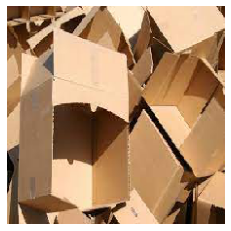

Your waste material mainly consits of  Cardboard
The best way to dispose of Cardboard is to Recycle them, So visit your nearest Recycling Center.


In [28]:
garbage_prediction("input1.jpg")

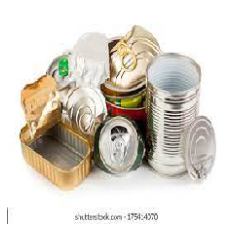

Your waste material mainly consits of  Metal
Metal can be recycled. For more on Recycling Metal visit: https://www.conserve-energy-future.com/recyclingmetal.php


In [34]:
garbage_prediction("input3.jpg")

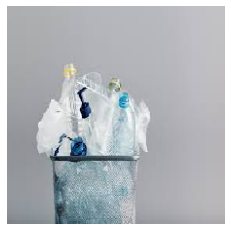

Your waste material mainly consits of  Plastic
Plastic can cause real harm to society, so before disposing them make sure that they are either reused or recycled. For more info visit: https://bioplasticsnews.com/2019/10/22/how-to-use-recycle-and-dispose-plastic-bags-responsibly/


In [45]:
garbage_prediction("input2.jpg")

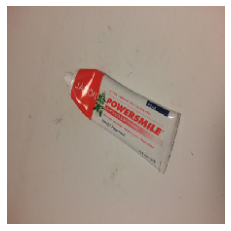

Your waste material mainly consits of  Trash
Your garbage only consits of trash which can neither be resused nor recycled.


In [46]:
garbage_prediction("input4.jpg")